In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

path=r"C:\Users\deepa\Downloads\train.csv"


In [96]:
df=pd.read_csv(path,usecols=['Age','Fare','Survived'])

In [97]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [98]:
df.isna().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [99]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
x_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [102]:
x_train['age_imputed']=x_train['Age']
x_test['age_imputed']=x_test['Age']

In [103]:
x_train

,Age,Fare,age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [104]:
x_train['age_imputed'].isna().sum()

np.int64(140)

In [105]:
x_train.isna().sum()

Age            140
Fare             0
age_imputed    140
dtype: int64

In [106]:
x_train['age_imputed'][x_train['age_imputed'].isna()]=x_train['Age'].dropna().sample(x_train['age_imputed'].isna().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isna()]=x_train['Age'].dropna().sample(x_test['age_imputed'].isna().sum()).values

C:\Users\deepa\AppData\Local\Temp\ipykernel_14468\3943601773.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'][x_train['age_imputed'].isna()]=x_train['Age'].dropna().sample(x_train['age_imputed'].isna().sum()).values

In [107]:
x_train.isna().sum()

Age            140
Fare             0
age_imputed      0
dtype: int64

In [108]:
x_train

,Age,Fare,age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,22.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [109]:
import seaborn as sns

C:\Users\deepa\AppData\Local\Temp\ipykernel_14468\328563191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=True)
C:\Users\deepa\AppData\Local\Temp\ipykernel_14468\328563191.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['age_imputed

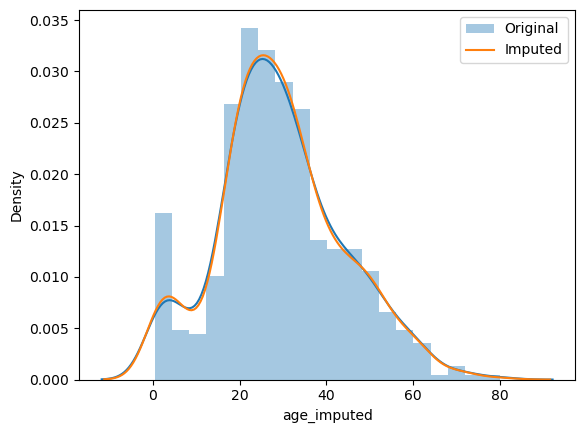

In [112]:
sns.distplot(x_train['Age'],label='Original',hist=True)
sns.distplot(x_train['age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [113]:
x_train['Age'].var()

210.2517072477438

In [114]:
x_train['age_imputed'].var()

208.30469305595082

In [118]:
x_train[['Fare','Age','age_imputed']].cov()

,Fare,Age,age_imputed
Fare,2700.831981,71.580633,51.834558
Age,71.580633,210.251707,210.251707
age_imputed,51.834558,210.251707,208.304693


<Axes: >

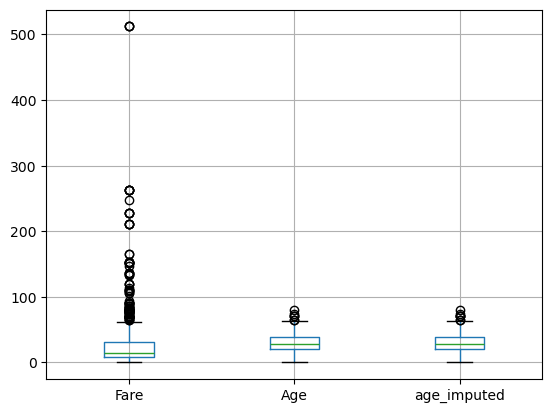

In [119]:
x_train[['Fare','Age','age_imputed']].boxplot()